In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Function for performing sentiment analysis on a user's Twitter feed. 
# Requires Twitter username, number of pages of tweets, name of the list to save the results
def sentiment_analysis(user, pages, variable_name):
    
    # Counter
    counter = 1
    
    # Variable for max_id
    oldest_tweet = None

    # Loop through given pages of tweets
    for x in range(pages):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, max_id = oldest_tweet)

        #Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
            
            # Add sentiments for each tweet into a list
            variable_name.append({"Username": user,
                                  "Date": tweet["created_at"],
                                  "Tweet": tweet["text"],
                                  "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": counter})
            
            # Add to counter 
            counter += 1           

In [3]:
# Variables for holding sentiments
BBC_sentiments = []
CBS_sentiments = []
CNN_sentiments = []
FOX_sentiments = []
NYT_sentiments = []

In [4]:
# Get 100 tweets from @BBCWorld and analyze
sentiment_analysis("@BBCWorld", 5, BBC_sentiments)
BBC_df = pd.DataFrame(BBC_sentiments)
BBC_df = BBC_df[["Username", "Tweet", "Date", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"]]
BBC_df.to_csv("BBC_News_Tweets.csv")
BBC_df.head()

,Username,Tweet,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,@BBCWorld,Anthony Bourdain: Chef breaks into tears remem...,Sat Jun 09 03:52:37 +0000 2018,0.3182,0.244,0.145,0.611,1
1,@BBCWorld,Jobless young Italians abandon charms of south...,Sat Jun 09 03:34:58 +0000 2018,0.0000,0.246,0.246,0.508,2
2,@BBCWorld,India women pay tribute to Bollywood star Srid...,Sat Jun 09 03:14:00 +0000 2018,-0.1027,0.000,0.123,0.877,3
3,@BBCWorld,Tayyaba abuse case shines light on Pakistan's ...,Sat Jun 09 03:09:29 +0000 2018,-0.6369,0.000,0.318,0.682,4
4,@BBCWorld,Maria Esther Bueno: Brazilian star of 1960s wo...,Sat Jun 09 01:59:35 +0000 2018,0.0000,0.000,0.000,1.000,5


In [5]:
# Get 100 tweets from @CBSNews and analyze
sentiment_analysis("@CBSNews", 5, CBS_sentiments)
CBS_df = pd.DataFrame(CBS_sentiments)
CBS_df = CBS_df[["Username", "Tweet", "Date", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"]]
CBS_df.to_csv("CBS_News_Tweets.csv")
CBS_df.head()

,Username,Tweet,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,@CBSNews,5 dangerous myths about Social Security https:...,Sat Jun 09 04:48:03 +0000 2018,-0.1779,0.229,0.295,0.476,1
1,@CBSNews,High school valedictorian says mic was cut bef...,Sat Jun 09 04:33:03 +0000 2018,-0.7096,0.000,0.330,0.670,2
2,@CBSNews,Woman who led private investigator to stepson'...,Sat Jun 09 04:18:03 +0000 2018,-0.6486,0.000,0.264,0.736,3
3,@CBSNews,Gloria Williams sentenced for kidnapping newbo...,Sat Jun 09 04:03:06 +0000 2018,-0.0258,0.000,0.073,0.927,4
4,@CBSNews,The Warriors defeated LeBron James and the Cav...,Sat Jun 09 03:50:00 +0000 2018,0.1531,0.187,0.157,0.657,5


In [6]:
# Get 100 tweets from @CNN and analyze
sentiment_analysis("@CNN", 5, CNN_sentiments)
CNN_df = pd.DataFrame(CNN_sentiments)
CNN_df = CNN_df[["Username", "Tweet", "Date", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"]]
CNN_df.to_csv("CNN_News_Tweets.csv")
CNN_df.head()

,Username,Tweet,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,@CNN,BlackBerry still hopes its keyboard keeps fans...,Sat Jun 09 04:46:00 +0000 2018,0.4215,0.219,0.000,0.781,1
1,@CNN,Venezuela ranks as the most dangerous country ...,Sat Jun 09 04:31:04 +0000 2018,-0.3597,0.082,0.146,0.773,2
2,@CNN,This surveillance camera footage from last wee...,Sat Jun 09 04:16:00 +0000 2018,0.0000,0.000,0.000,1.000,3
3,@CNN,Time cover gets Trump just right | By Michael ...,Sat Jun 09 04:01:07 +0000 2018,0.0000,0.000,0.000,1.000,4
4,@CNN,"One step on the island of Bermuda, and it's im...",Sat Jun 09 03:46:00 +0000 2018,0.5859,0.153,0.000,0.847,5


In [7]:
# Get 100 tweets from @FoxNews and analyize
sentiment_analysis("@FoxNews", 5, FOX_sentiments)
FOX_df = pd.DataFrame(FOX_sentiments)
FOX_df = FOX_df[["Username", "Tweet", "Date", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"]]
FOX_df.to_csv("FOX_News_Tweets.csv")
FOX_df.head()

,Username,Tweet,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,@FoxNews,.@POTUS: “You can not leak classified informat...,Sat Jun 09 04:46:00 +0000 2018,0.7380,0.28,0.000,0.720,1
1,@FoxNews,Multiple inquiries into use of force after sev...,Sat Jun 09 04:31:00 +0000 2018,-0.0516,0.00,0.079,0.921,2
2,@FoxNews,.@MarcThiessen: Obama took lying to new height...,Sat Jun 09 04:15:00 +0000 2018,-0.5267,0.00,0.207,0.793,3
3,@FoxNews,"1 US soldier killed, 4 wounded in Somalia atta...",Sat Jun 09 04:05:59 +0000 2018,-0.8225,0.00,0.559,0.441,4
4,@FoxNews,Indiana high school teacher claims he was forc...,Sat Jun 09 04:03:00 +0000 2018,-0.6597,0.00,0.293,0.707,5


In [8]:
# Get 100 tweets from @nytimes
sentiment_analysis("@nytimes", 5, NYT_sentiments)
NYT_df = pd.DataFrame(NYT_sentiments)
NYT_df = NYT_df[["Username", "Tweet", "Date", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"]]
NYT_df.to_csv("NYT_News_Tweets.csv")
NYT_df.head()

,Username,Tweet,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,@nytimes,"In Canada, many observers were calling it the ...",Sat Jun 09 04:45:03 +0000 2018,-0.3400,0.000,0.107,0.893,1
1,@nytimes,RT @kenvogel: MANAFORT paid KONSTANTIN KILIMNI...,Sat Jun 09 04:30:05 +0000 2018,-0.0387,0.000,0.052,0.948,2
2,@nytimes,What should you do when a loved one is severel...,Sat Jun 09 04:15:04 +0000 2018,-0.5574,0.148,0.322,0.530,3
3,@nytimes,"""This should be a grave concern to anyone who ...",Sat Jun 09 04:06:01 +0000 2018,0.1027,0.139,0.120,0.741,4
4,@nytimes,RT @NYTSports: Kevin Durant has been named the...,Sat Jun 09 04:01:40 +0000 2018,0.2263,0.095,0.000,0.905,5


In [9]:
# Consolidate sentiment scores for all users
dataframe_list = [BBC_df, CBS_df, CNN_df, FOX_df, NYT_df]
sentiments_df = pd.DataFrame(columns=[])
for i in range(len(dataframe_list)):
    sentiments_df = sentiments_df.append(dataframe_list[i], ignore_index=True)
sentiments_df.count()

Username      500
Tweet         500
Date          500
Compound      500
Positive      500
Neutral       500
Negative      500
Tweets Ago    500
dtype: int64

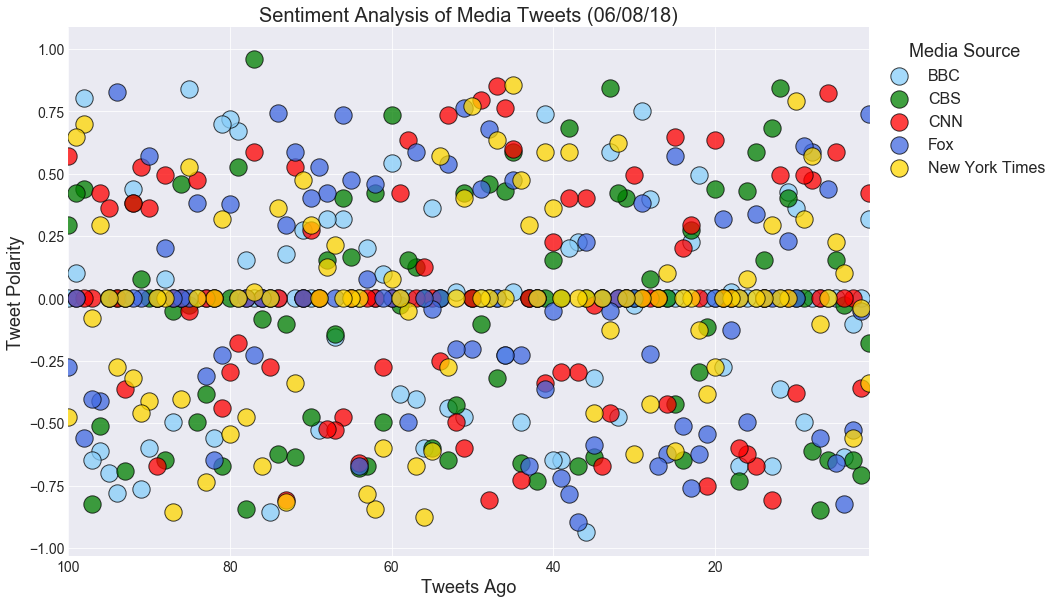

In [10]:
# Scatter plot for compound sentiment scores for all users
sns.set_style("darkgrid")
sns.lmplot(x="Tweets Ago", y="Compound", data=sentiments_df, fit_reg=False, hue="Username", legend_out=False, \
           scatter_kws={"s": 300, "edgecolor":"black", "alpha": .75}, \
           palette= ["lightskyblue", "green", "red", "royalblue", "gold"], size=8, aspect=1.5)

# Format legend
new_labels = ["BBC", "CBS", "CNN", "Fox", "New York Times"]
legend=plt.legend(bbox_to_anchor=(1,1), title="Media Source", labels = new_labels, fontsize="16")
legend.get_title().set_fontsize("18")

# Format Chart
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})", size=20)
plt.xlim([sentiments_df["Tweets Ago"].max(),sentiments_df["Tweets Ago"].min()])
plt.ylabel("Tweet Polarity", size=18)
plt.xlabel("Tweets Ago", size=18)
plt.tick_params(axis="both", labelsize="14")

# Save and display chart
plt.savefig("SentimentAnalysisPerUser.png", bbox_inches="tight")
plt.show()

In [11]:
BBC_overall = BBC_df["Compound"].mean()
CBS_overall = CBS_df["Compound"].mean()
CNN_overall = CNN_df["Compound"].mean()
FOX_overall = FOX_df["Compound"].mean()
NYT_overall = NYT_df["Compound"].mean()
sentiment = [BBC_overall, CBS_overall, CNN_overall, FOX_overall, NYT_overall]
users = ["BBC", "CBS", "CNN", "FOX", "NYT"]
x_axis = np.arange(len(users))

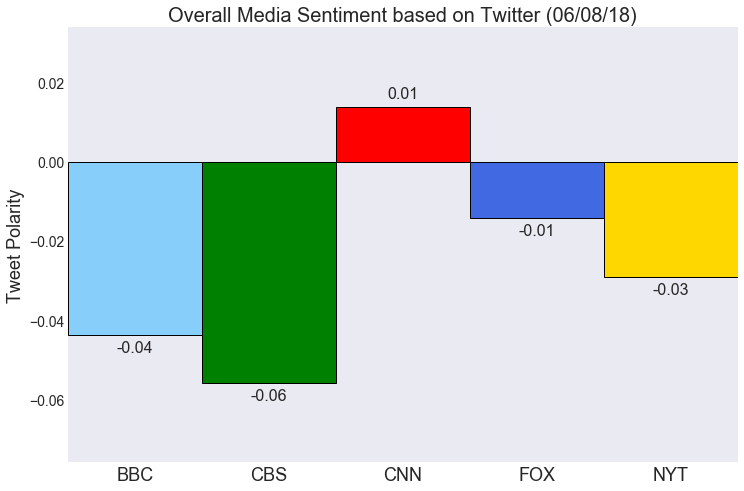

In [12]:
# Bar chart for overall compound sentiment scores for all users
plt.figure(figsize=(12,8))
ax = plt.bar(x_axis, sentiment, color=("lightskyblue", "green", "red", "royalblue", "gold"), width=1.0, edgecolor="black")
plt.grid(False)

# Format bar chart
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Overall Media Sentiment based on Twitter ({now})", size=20)
plt.ylabel("Tweet Polarity", size=18)
plt.tick_params(axis="y", labelsize="14")
plt.ylim(np.min(sentiment)-.02, np.max(sentiment)+.02)
plt.xlim(-0.5, len(x_axis)-.5)
plt.xticks(x_axis, users, fontsize="18")

# For each bar: Place a label
rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.2f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va,                      # Vertically align label differently for positive and negative values.
        fontsize="16")              # Set font size

# Save and display chart    
plt.savefig("OverallSentimentAnalysisPerUser.png", bbox_inches="tight")
plt.show()

# Observed Trends

In-class activities didn't give me a lot of hope for gathering meaningful results from Sentiment analysis of Twitter posts. The few users I analyzed were mostly neutral, so I fully expected the same for these 5 users. It turned out to be more interesting than that.

For example, I noticed while working on the assignment, that the sentiment analysis varied with the time of day. Technically, news is on 24/7, however since 4 of the 5 users analyzed are based in the US, it makes sense that the trend would follow US time, i.e., morning, afternoon, night. Since it did seem that posts analyzed in the morning (AM) differed from those in the evening (PM). Case in point, the final analysis posted for the homework was done late at night and 4 of the 5 trend toward negative. Is it because things happened during the day? or the person(s) tweeting are tired and ready to call it quits? or are they finding news from the day before and reporting later in the day? Not enough time to pursue this train of thought. I've stored this for a future project, maybe.

The scatter plot is fun to look at and it might seem like it doesn't provide much info since there doesn't really seem to be a trend.  At first look, it leads the viewer to think there is a trend towards "neutral", since there seems to be a concentration at 0 and it is what I found in the in-class activities mentioned above. After looking at it again, I see that's not necessarily true. The plot shows that the news outlets post negative, neutral, and positive tweets. They may have an alorigthm of their own, to make sure they don't post too much of one and not another. 

As I mentined above, the sentiment analysis varied by the time of day. When I had run the last chart earlier in the day, the overall sentiment trended toward neutral, but now, late at night, it's trending towards negative. I'm not surprised FOX is closer to neurtral, since the popular opinion is that FOX is "conservative" and our current government is mostly "conservative", so they should probably be posting more positive tweets than negative. I am surprised NYT is negative, since I consider them a "lifestyle" news outlet. I would have expected them to be neutral, trending towards positive.

